<a href="https://colab.research.google.com/github/2403a52264-debug/NLP/blob/main/2403A52264_NLP_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:
data = pd.read_csv('/content/Tweets.csv')
print(data.head())

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

In [3]:
tweet = data['text']
print(tweet.head())

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object


In [4]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [5]:
def tokenize_text(text):
    return word_tokenize(text)

tokenised_tweet = tweet.apply(tokenize_text)

print(tokenised_tweet.head())


0       [@, VirginAmerica, What, @, dhepburn, said, .]
1    [@, VirginAmerica, plus, you, 've, added, comm...
2    [@, VirginAmerica, I, did, n't, today, ..., Mu...
3    [@, VirginAmerica, it, 's, really, aggressive,...
4    [@, VirginAmerica, and, it, 's, a, really, big...
Name: text, dtype: object


In [6]:
import re

def extract_actual_hashtags(text):
    return re.findall(r'#\w+', text)
extracted_hashtags = tweet.apply(extract_actual_hashtags)

print(extracted_hashtags)

0                     []
1                     []
2                     []
3                     []
4                     []
              ...       
14635                 []
14636                 []
14637    [#BlackBerry10]
14638                 []
14639                 []
Name: text, Length: 14640, dtype: object


In [7]:

from collections import Counter

all_hashtags = [hashtag for sublist in extracted_hashtags for hashtag in sublist]


hashtag_frequencies = Counter(all_hashtags)


for hashtag, count in hashtag_frequencies.most_common(5):
    print(f"- {hashtag}: {count}")

- #DestinationDragons: 75
- #fail: 57
- #jetblue: 35
- #UnitedAirlines: 35
- #customerservice: 34


# Here we are plotting the counter values

/tmp/ipython-input-698154760.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hashtags, y=counts, palette='viridis')


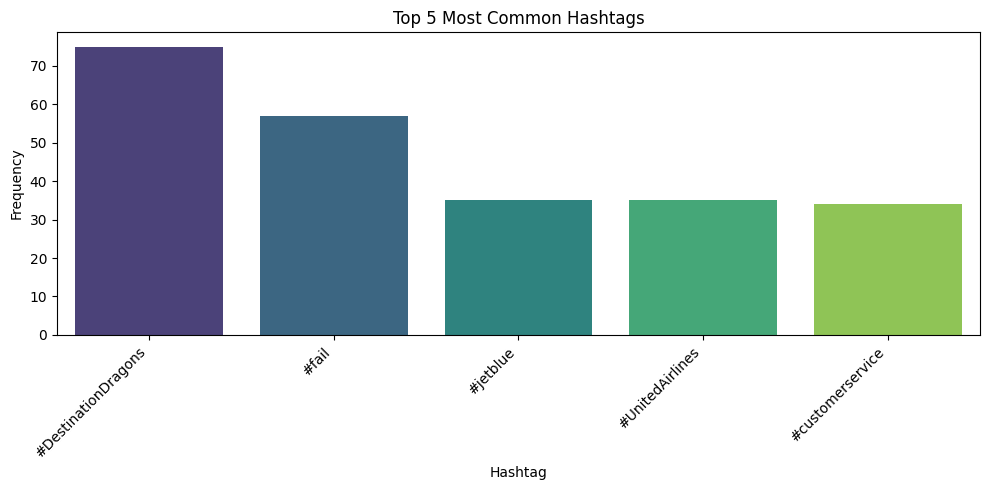

In [8]:

top5_hashtags = hashtag_frequencies.most_common(5)

hashtags = [item[0] for item in top5_hashtags]
counts = [item[1] for item in top5_hashtags]


plt.figure(figsize = (10,5))

sns.barplot(x=hashtags, y=counts, palette='viridis')
plt.title('Top 5 Most Common Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Here we are cleaning the text

In [9]:
import re

def clean_text(text):
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text.strip()
cleaned_tweets = data['text'].apply(clean_text)
print(data['text'].head())
print(cleaned_tweets.head())

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object
0                                           what  said
1    plus youve added commercials to the experience...
2    i didnt today must mean i need to take another...
3    its really aggressive to blast obnoxious enter...
4              and its a really big bad thing about it
Name: text, dtype: object


# Tokenization

In [16]:
from nltk.tokenize import word_tokenize
def tokenize_text(text):
    return word_tokenize(text)
tokenised_tweet = cleaned_tweets.apply(tokenize_text)
print("Cleaned Text\n",cleaned_tweets.head())
print("Tokenised Text\n",tokenised_tweet.head)

Cleaned Text
 0                                           what  said
1    plus youve added commercials to the experience...
2    i didnt today must mean i need to take another...
3    its really aggressive to blast obnoxious enter...
4              and its a really big bad thing about it
Name: text, dtype: object
Tokenised Text
 <bound method NDFrame.head of 0                                             [what, said]
1        [plus, youve, added, commercials, to, the, exp...
2        [i, didnt, today, must, mean, i, need, to, tak...
3        [its, really, aggressive, to, blast, obnoxious...
4        [and, its, a, really, big, bad, thing, about, it]
                               ...                        
14635    [thank, you, we, got, on, a, different, flight...
14636    [leaving, over, minutes, late, flight, no, war...
14637    [please, bring, american, airlines, to, blackb...
14638    [you, have, my, money, you, change, my, flight...
14639    [we, have, ppl, so, we, need, know, how,

# Removing stopwords

In [20]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

new_tweets = tokenised_tweet.apply(remove_stopwords)
print("Tokenised_tweets\n",tokenised_tweet.head())
print("New_tweets\n",new_tweets.head)

Tokenised_tweets
 0                                         [what, said]
1    [plus, youve, added, commercials, to, the, exp...
2    [i, didnt, today, must, mean, i, need, to, tak...
3    [its, really, aggressive, to, blast, obnoxious...
4    [and, its, a, really, big, bad, thing, about, it]
Name: text, dtype: object
New_tweets
 <bound method NDFrame.head of 0                                                   [said]
1        [plus, youve, added, commercials, experience, ...
2        [didnt, today, must, mean, need, take, another...
3        [really, aggressive, blast, obnoxious, enterta...
4                                [really, big, bad, thing]
                               ...                        
14635             [thank, got, different, flight, chicago]
14636    [leaving, minutes, late, flight, warnings, com...
14637      [please, bring, american, airlines, blackberry]
14638    [money, change, flight, dont, answer, phones, ...
14639    [ppl, need, know, many, seats, next, fli

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Lemmatization

In [24]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

lemmatized_tweets = new_tweets.apply(lemmatize_tokens)

print("\n",new_tweets.head())
print("\n",lemmatized_tweets.head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



 0                                               [said]
1    [plus, youve, added, commercials, experience, ...
2    [didnt, today, must, mean, need, take, another...
3    [really, aggressive, blast, obnoxious, enterta...
4                            [really, big, bad, thing]
Name: text, dtype: object

 0                                               [said]
1    [plus, youve, added, commercial, experience, t...
2    [didnt, today, must, mean, need, take, another...
3    [really, aggressive, blast, obnoxious, enterta...
4                            [really, big, bad, thing]
Name: text, dtype: object


# Joining tokens

In [26]:
def join_tokens(tokens):
    return ' '.join(tokens)
preprocessed_tweets = lemmatized_tweets.apply(join_tokens)

print(preprocessed_tweets.head())

0                                                 said
1         plus youve added commercial experience tacky
2         didnt today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
Name: text, dtype: object


# PoS tagging

In [32]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')
from nltk import pos_tag
def tag_tokens(tokens):
    return pos_tag(tokens)

pos_tagged_tweets = new_tweets.apply(pos_tag)

print(pos_tagged_tweets.head())

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


0                                        [(said, VBD)]
1    [(plus, CC), (youve, NN), (added, JJ), (commer...
2    [(didnt, NN), (today, NN), (must, MD), (mean, ...
3    [(really, RB), (aggressive, JJ), (blast, NN), ...
4    [(really, RB), (big, JJ), (bad, JJ), (thing, NN)]
Name: text, dtype: object
